# Sistema de agrupación de casas

Paso 1: Carga del conjunto de datos

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
data = df[["Latitude", "Longitude", "MedInc"]]
data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [29]:
from sklearn.model_selection import train_test_split
X = data

x_train, x_test = train_test_split(X, test_size= 0.2, random_state=42)

Paso 2: Construye un K-Means

In [30]:
import numpy as np
from sklearn.cluster import KMeans


# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(x_train)



KMeans(n_clusters=6, random_state=42)

In [31]:
model.labels_

array([3, 1, 1, ..., 3, 0, 5])

In [32]:
model.labels_.shape

(16512,)

In [33]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5])

In [34]:
x_train["Cluster"] = model.labels_

Se lo pasamos a x_train ya que hemos hecho la separación, posteriormente si supieramos respecto a los datos sería analizar el target

In [35]:
x_train

,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,2
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


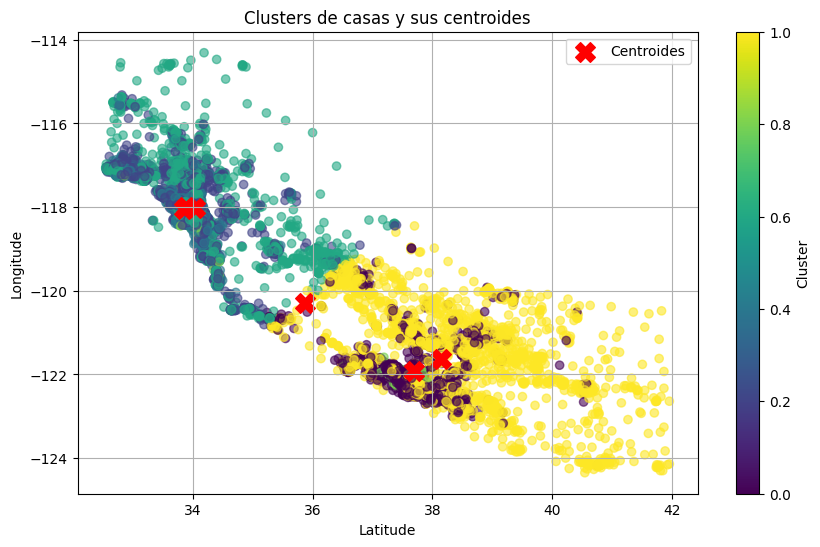

In [36]:
import matplotlib.pyplot as plt

# Scatter de los puntos
plt.figure(figsize=(10,6))
plt.scatter(x_train['Latitude'], x_train['Longitude'], c=x_train['Cluster'], cmap='viridis', alpha=0.6)

# Centroides
centroides = model.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

# Estética
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters de casas y sus centroides')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

Representación gráfica 3D

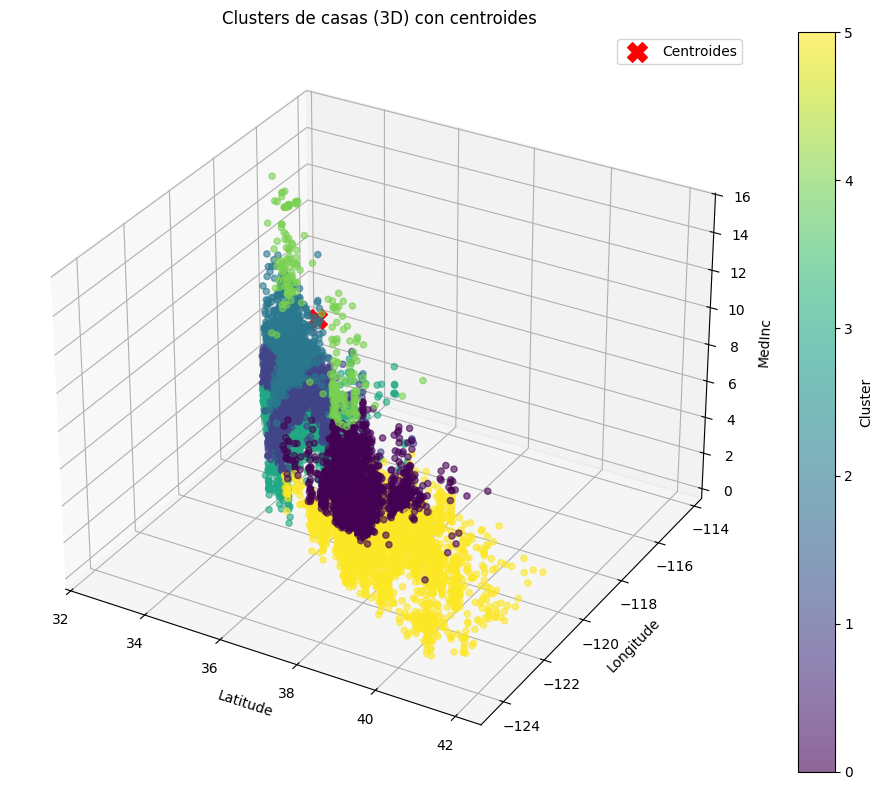

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de los puntos
sc = ax.scatter(
    x_train['Latitude'], x_train['Longitude'], x_train['MedInc'],
    c=x_train['Cluster'], cmap='viridis', alpha=0.6
)

# Centroides
centroides = model.cluster_centers_
ax.scatter(
    centroides[:, 0], centroides[:, 1], centroides[:, 2],
    c='red', marker='X', s=200, label='Centroides', depthshade=False
)

# Etiquetas
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedInc')
ax.set_title('Clusters de casas (3D) con centroides')
fig.colorbar(sc, label='Cluster')
plt.legend()
plt.tight_layout()
plt.show()


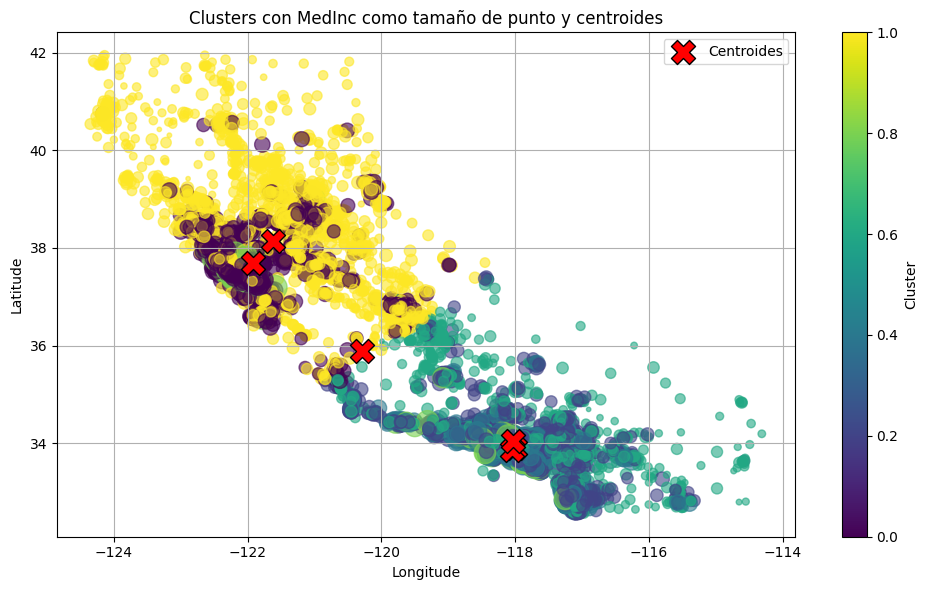

In [38]:
plt.figure(figsize=(10, 6))

# Scatter de los puntos
plt.scatter(
    x_train['Longitude'], x_train['Latitude'],
    c=x_train['Cluster'], cmap='viridis',
    s=x_train['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6,
)

# Centroides
centroides = model.cluster_centers_
plt.scatter(
    centroides[:, 1], centroides[:, 0],  # Longitude y Latitude
    c='red', edgecolors='black', marker='X', s=300, label='Centroides',
    zorder=10  # Asegura que estén por encima
)

# Estética
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters con MedInc como tamaño de punto y centroides')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

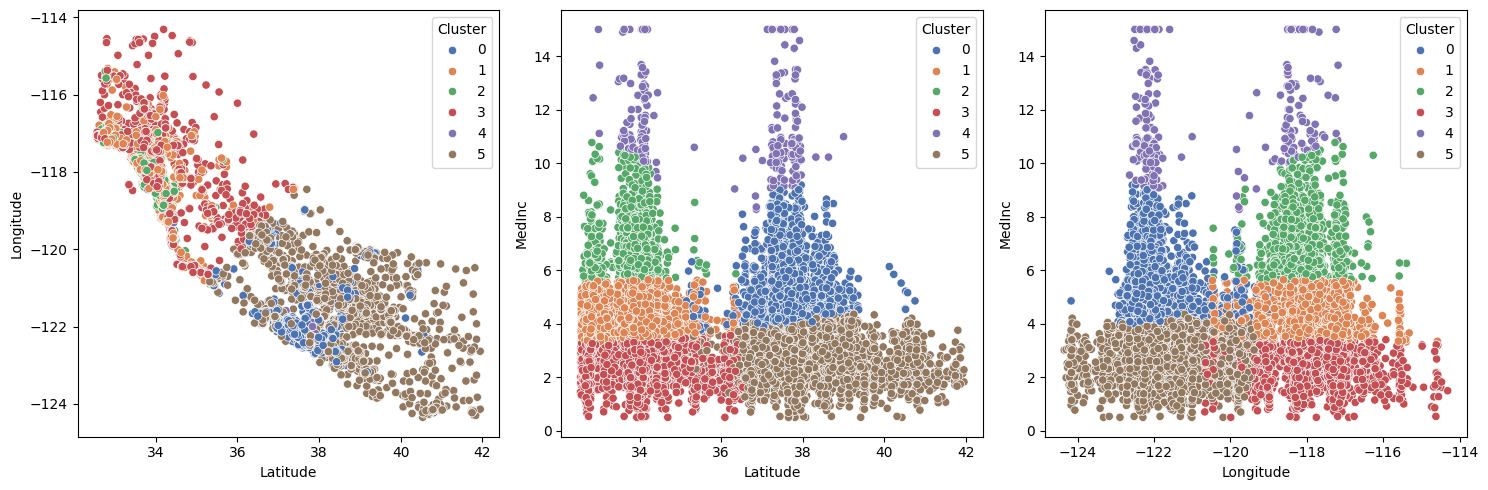

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = x_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = x_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = x_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()

plt.show()

### Paso 3: Predice con el conjunto de test

In [40]:
# Realizar predicciones con datos nuevos
new_data = x_test
predictions = model.predict(new_data)

In [41]:
predictions

array([3, 3, 5, ..., 4, 5, 1])

In [42]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5])

In [43]:
x_test['Cluster'] = predictions
x_test.head()

,Latitude,Longitude,MedInc,Cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


Se redondea en negro los que pertenecen a los datos de test.

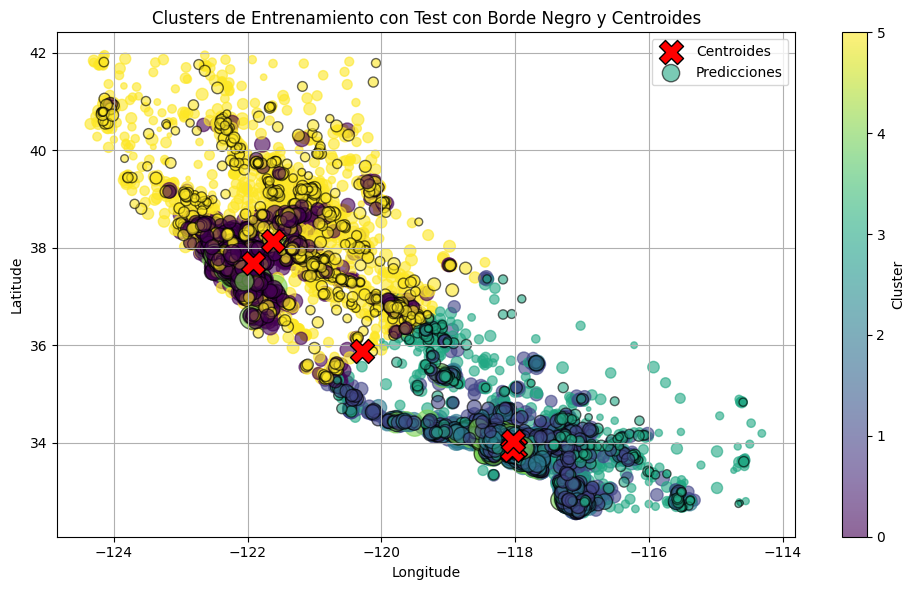

In [44]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(10, 6))

# Scatter de los puntos de entrenamiento con colores por cluster
plt.scatter(
    x_train['Longitude'], x_train['Latitude'],
    c=x_train['Cluster'], cmap='viridis',
    s=x_train['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6,
)

# Centroides
centroides = model.cluster_centers_
plt.scatter(
    centroides[:, 1], centroides[:, 0],  # Longitude y Latitude
    c='red', edgecolors='black', marker='X', s=300, label='Centroides',
    zorder=10  # Asegura que estén por encima
)

# Scatter de los puntos de test con borde negro
plt.scatter(
    x_test['Longitude'], x_test['Latitude'],
    c=x_test['Cluster'], cmap='viridis',  # Usamos el mismo cmap para asignar colores por predicción
    s=x_test['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6, edgecolors='black',  # Borde negro para diferenciarlos
    label='Predicciones'
)

# Estética
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Entrenamiento con Test con Borde Negro y Centroides')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mamen\AppData\Local\Temp\ipykernel_21740\2969998734.py:12: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(
C:\Users\mamen\AppData\Local\Temp\ipykernel_21740\2969998734.py:12: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(
C:\Users\mamen\AppData\Local\Temp\ipykernel_21740\2969998734.py:12: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


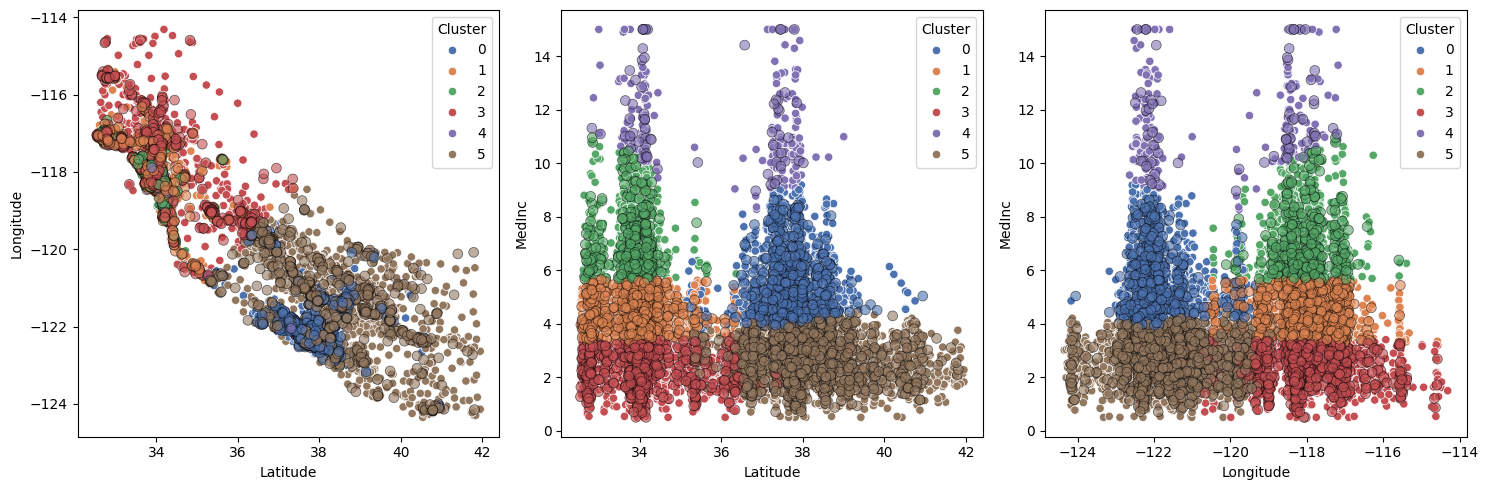

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = x_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = x_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = x_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
palette = sns.color_palette("deep")
# Puntos de test con borde negro
for i, (x, y) in enumerate([("Latitude", "Longitude"), ("Latitude", "MedInc"), ("Longitude", "MedInc")]):
    sns.scatterplot(
        ax=axis[i],
        data=x_test,
        x=x, y=y,
        hue="Cluster",
        palette=palette,
        legend=False,
        marker='o',  # círculo
        edgecolor='black',
        linewidth=0.5,
        s=50,  # tamaño, ajusta si quieres según MedInc u otro valor
        alpha=0.6
    )
plt.tight_layout()

plt.show()

Dendograma

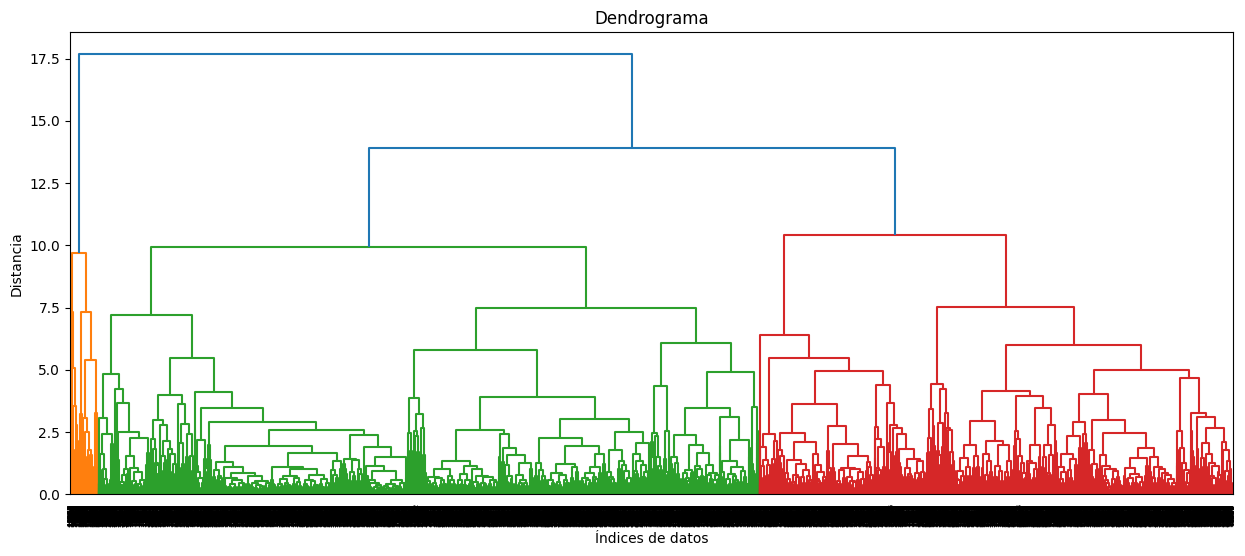

In [46]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs


# Calcular la matriz de similitud entre clusters
Z = linkage(x_train, method = "complete")

# Mostrar el dendrograma
plt.figure(figsize = (15, 6))

dendrogram(Z)

plt.title("Dendrograma")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

### Paso 4: Entrena un modelo de clasificación supervisada

Hay que separar lo x_train y x_test de los target que habíamos metido dentro para representar en el paso anterior. Pero se debería de quitar, por eso hacemos el drop en ambos df

In [47]:
from sklearn.neighbors import KNeighborsClassifier

y_train = x_train['Cluster']

x_train = x_train.drop('Cluster', axis=1)

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
x_test_copy = x_test.drop('Cluster', axis=1).copy()
y_pred = model_knn.predict(x_test_copy)
y_pred

array([3, 3, 5, ..., 4, 5, 1])

Observamos que se ha obtenido el 100%, tenemos un modelo perfecto para los datos

In [49]:
from sklearn.metrics import accuracy_score

y_test = x_test['Cluster']

accuracy_score(y_test, y_pred)

0.9920058139534884